In [41]:
def make_file_name(year,month):
    if month < 10:
        date = str(year) + '0' + str(month)
    else: 
        date = str(year) + str(month)
    return 'Article_부동산_'+ date + '_' + date

def make_date(year,month):
    date = ''
    if month < 10:
        date = str(year) + '0' + str(month)
    else: 
        date = str(year) + str(month)
    return date

def get_data_set(year, month):
    columns_name = ['date','cat','co','headLine','content','link']
    path = '../article/monthly_article/'
    file_name = make_file_name(year,month)
    df = pd.read_csv(path + file_name + '.csv', names = columns_name, encoding='CP949')
    return df

### monthly article data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = get_data_set(2006,1)
df.iloc[:,0].count()

article_monthly_count = pd.DataFrame({
    'article_monthly_count' : [get_data_set(year,month).iloc[:,0].count() for year in range(2006,2021) for month in range(1,13)]
})

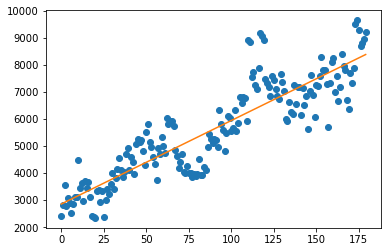

In [43]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
x = pd.Series([i for i in range(180)])
y = article_monthly_count.iloc[:,0]

line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

In [44]:
slope = line_fitter.coef_[0]
intercept = line_fitter.intercept_

print(f"function: {intercept} + {slope}*i")

function: 2862.850092081031 + 30.890687984197047*i


In [45]:
def flat_func(i):
    return slope*i + intercept

In [46]:
flatten_monthly = pd.DataFrame({'data' : [article_monthly_count['article_monthly_count'][i] - flat_func(i) for i in range(len(article_monthly_count))]})

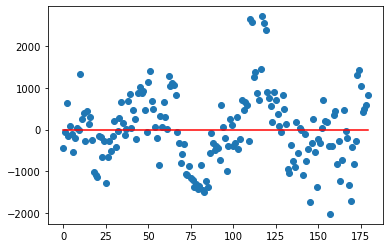

In [47]:
x1 = pd.Series([i for i in range(180)])
y1 = flatten_monthly['data']
plt.plot(x1, y1, 'o')

x2 = [i for i in range(180)]
y2 = [0 for i in range(180)]
plt.plot(x2, y2, color = 'r')

plt.show()

In [48]:
path = '../compare_data/'

flatten_monthly.to_csv(f'{path}flatten_monthly_article.csv')

### weekly article data

In [49]:
def get_weekly_data(i):
    df = pd.read_csv(f'../article/weekly_article/article_week{i}.csv', encoding = 'cp949')
    return df

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

article_weekly_count = pd.DataFrame({
    'article_weekly_count' : [get_weekly_data(i).iloc[:,0].count() for i in range(783)]
})

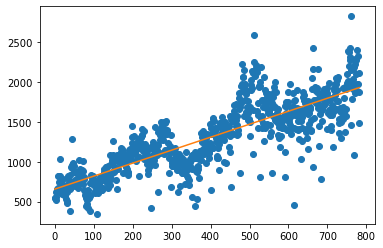

In [53]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
x = pd.Series([i for i in range(783)])
y = article_weekly_count.iloc[:,0]

line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

In [54]:
slope = line_fitter.coef_[0]
intercept = line_fitter.intercept_

print(f"function: {intercept} + {slope}*i")

function: 657.6224392055674 + 1.6267801723388*i


In [55]:
flatten_weekly = pd.DataFrame({'data' : [article_weekly_count['article_weekly_count'][i] - flat_func(i) for i in range(len(article_weekly_count))]})

In [56]:
path = '../compare_data/'

flatten_monthly.to_csv(f'{path}flatten_weekly_article.csv')